# Extra forest regressor

A demonstration of how to use the extra forest regressor. 

We also investigate the behaviour of the extra forest regressor when regressing on a binary dummy variable.

In [1]:
import extra_py as ep
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([
    [0, 0],
    [1, 1],
    [0, 1],
], dtype = np.float32)

y = np.array([0, 1, 1], dtype = np.float32)

model = ep.ExtraForestRegressor(n_estimators=500)

In [3]:
model.fit(X, y)

In [4]:
model.predict(X)

array([0., 1., 1.], dtype=float32)

Let's observe a few of the underlying trees that have been made.

In [7]:
model.get_debug_tree_descriptions()[:3]

['Branch(NumericalSplitter(1, 0.67519075), Leaf(0.0), Leaf(1.0))',
 'Branch(NumericalSplitter(1, 0.71280414), Leaf(0.0), Leaf(1.0))',
 'Branch(NumericalSplitter(1, 0.43100762), Leaf(0.0), Leaf(1.0))']

We observe we end up with trees with a single branch for the second feature. 

Let's analyze the behaviour of the entire forest by considering different possible values for the second feature and the corresponding predicted values.

Text(0.5, 1.0, 'ExtraTreesRegressor predictions')

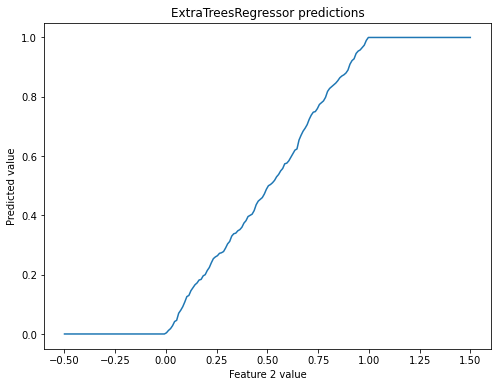

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
xvals = np.linspace(-0.5, 1.5, 200)
Xprime = np.array([[0, x] for x in xvals], dtype = np.float32)
yprime = model.predict(Xprime)

plt.plot(xvals, yprime)
plt.xlabel('Feature 2 value')
plt.ylabel('Predicted value')
plt.title('ExtraTreesRegressor predictions')

We observe the prediction represents a linearly increasing "propensity to be 1".